___
# PROJETO 2

## Franciso Ciol R. Aveiro

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\frana\OneDrive\Documentos\Insper\Ciencia dos Dados DP\CDAgoraVai\CDAgoraVai\aula15


In [2]:
espectativa = pd.read_excel('Life.xlsx')
pd1800 = espectativa.A1800[(espectativa.A1800 < 120) & (espectativa.A1900 < 120) & (espectativa.A2000 < 120)]
pd1900 = espectativa.A1900[(espectativa.A1800 < 120) & (espectativa.A1900 < 120) & (espectativa.A2000 < 120)]
pd2000 = espectativa.A2000[(espectativa.A1800 < 120) & (espectativa.A1900 < 120) & (espectativa.A2000 < 120)]

___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida
1800
1900
2000

___
### Análise Descritiva

In [3]:
print('1800 descrição')
pd1800.describe()

1800 descrição


count    201.000000
mean      31.485800
std        3.763625
min       23.387000
25%       29.000000
50%       31.800000
75%       33.900000
max       42.845599
Name: A1800, dtype: float64

In [4]:
print('1900 descrição')
pd1900.describe()

1900 descrição


count    201.000000
mean      33.013071
std        6.336991
min       18.350000
25%       29.200000
50%       32.000000
75%       35.179000
max       53.470000
Name: A1900, dtype: float64

In [5]:
print('2000 descrição')
pd2000.describe()

2000 descrição


count    201.000000
mean      68.012856
std        9.211812
min       45.700000
25%       61.400000
50%       71.200000
75%       75.000000
max       81.100000
Name: A2000, dtype: float64

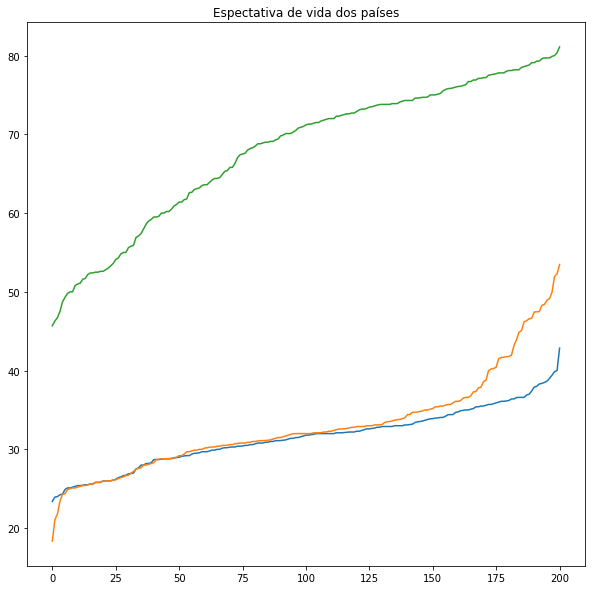

In [6]:
fig = plt.figure(figsize=(10,10))
plt.plot(sorted(pd1800))
plt.plot(sorted(pd1900))
plt.plot(sorted(pd2000))
plt.title('Espectativa de vida dos países')

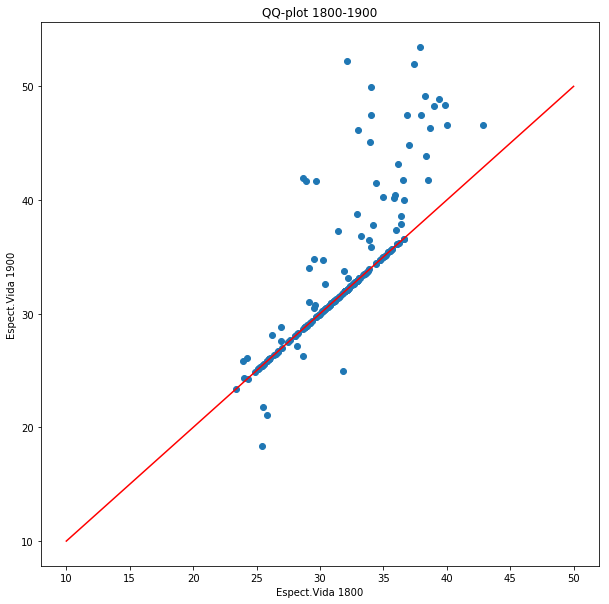

In [7]:
fig = plt.figure(figsize=(10, 10))
plt.plot(pd1800,pd1900,'o',)
plt.plot((10,50),(10,50),'r')
plt.xlabel('Espect.Vida 1800')
plt.ylabel('Espect.Vida 1900')
plt.title('QQ-plot 1800-1900')

plt.show()

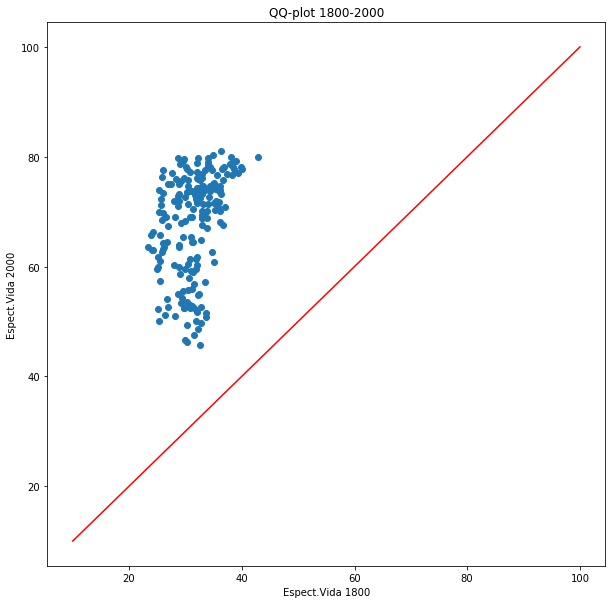

In [8]:
fig = plt.figure(figsize=(10, 10))
plt.plot(pd1800,pd2000,'o',)
plt.plot((10,100),(10,100),'r')
plt.xlabel('Espect.Vida 1800')
plt.ylabel('Espect.Vida 2000')
plt.title('QQ-plot 1800-2000')

plt.show()

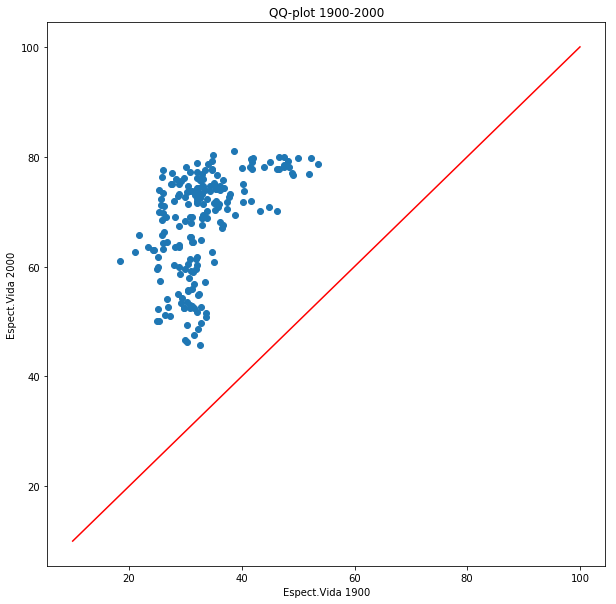

In [9]:
fig = plt.figure(figsize=(10, 10))
plt.plot(pd1900,pd2000,'o',)
plt.plot((10,100),(10,100),'r')
plt.xlabel('Espect.Vida 1900')
plt.ylabel('Espect.Vida 2000')
plt.title('QQ-plot 1900-2000')

plt.show()

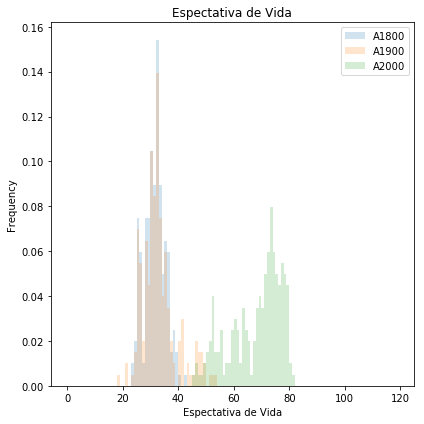

In [10]:
fig = plt.figure(figsize=(15,15))


faixas = range(0,120,1)

pd1800.plot.hist(bins=faixas,title='Espectativa de Vida', figsize=(6, 6), alpha=0.2, normed=1)
pd1900.plot.hist(bins=faixas,title='Espectativa de Vida', figsize=(6, 6), alpha=0.2, normed=1)
pd2000.plot.hist(bins=faixas,title='Espectativa de Vida', figsize=(6, 6), alpha=0.2, normed=1)
plt.legend()
plt.xlabel('Espectativa de Vida')


plt.tight_layout()
plt.show()

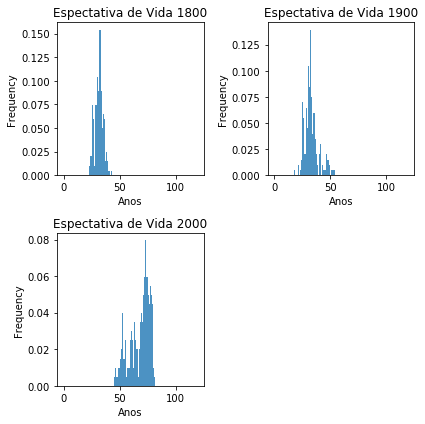

In [11]:
plt.figure(figsize=(15, 15))

plt.subplot(221)
pd1800.plot.hist(bins=faixas,title='Espectativa de Vida 1800', figsize=(6, 6), alpha=0.8, normed=1)
plt.xlabel('Anos')

plt.subplot(222)
pd1900.plot.hist(bins=faixas,title='Espectativa de Vida 1900', figsize=(6, 6), alpha=0.8, normed=1)
plt.xlabel('Anos')

plt.subplot(223)
pd2000.plot.hist(bins=faixas,title='Espectativa de Vida 2000', figsize=(6, 6), alpha=0.8, normed=1)
plt.xlabel('Anos')

plt.tight_layout()
plt.show()

## Análise:
Os anos de 1800 e 1900 apresentam um histograma parecido, mas com um leve aumento na espectativa de vida de alguns países. Já o ano de 2000 tem uma frequência com assimetria positiva(á direita.) Podemos ver isso em números com o describe dos anos. Em 1800 a média de vida do mmundo era 31, em 1900 era 33 e em 2000, 68 anos

### Aderência de um modelo probabilístico normal aos dados

In [12]:
variancia_amostral1900 = pd1900.var()
mi1900 = pd1900.mean()
teta1900 = variancia_amostral1900**(1/2)

variancia_amostral1800 = pd1800.var()
teta1800 = variancia_amostral1800**(1/2)
mi1800 = pd1800.mean()

variancia_amostral2000 = pd2000.var()
teta2000 = variancia_amostral2000**(1/2)
mi2000 = pd2000.mean()

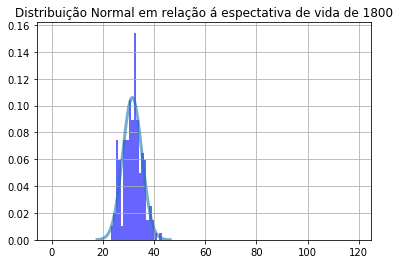

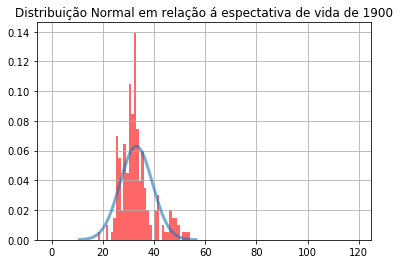

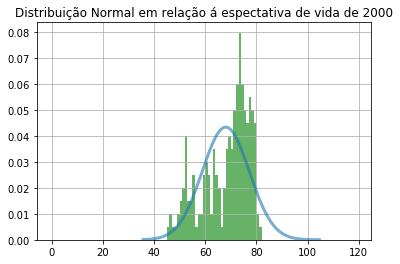

In [13]:

pd1800.hist(bins=faixas,color = 'b',alpha = 0.6, normed = 1)
x = sorted(stats.norm.rvs(size = 10000, loc = mi1800, scale = teta1800))
plt.plot(x, stats.norm.pdf(x, loc = mi1800, scale = teta1800), lw = 3, alpha = 0.6)
plt.title("Distribuição Normal em relação á espectativa de vida de 1800")
plt.show()

pd1900.hist(bins=faixas,color = 'r',alpha = 0.6, normed = 1)
x = sorted(stats.norm.rvs(size = 10000, loc = mi1900, scale = teta1900))
plt.plot(x, stats.norm.pdf(x, loc = mi1900, scale = teta1900), lw = 3, alpha = 0.6)
plt.title("Distribuição Normal em relação á espectativa de vida de 1900")
plt.show()


pd2000.hist(bins=faixas,color = 'g',alpha = 0.6, normed = 1)
x = sorted(stats.norm.rvs(size = 10000, loc = mi2000, scale = teta2000))
plt.plot(x, stats.norm.pdf(x, loc = mi2000, scale = teta2000), lw = 3, alpha = 0.6)
plt.title("Distribuição Normal em relação á espectativa de vida de 2000")
plt.show()


O ano de 1800 foi o ano que mais apresentou uma possível distribuição normal dos 3 anos estudados. Já os anos de 1900 e 2000 não se encaixam tanto nesse modelo.

In [14]:
frequencisa_relativa = []
for i in range(201):
    frequencisa_relativa.append ((i-0.5)/201)

In [15]:
frequencisa_normal1800 = []
for i in sorted(pd1800):
    frequencisa_normal1800.append(stats.norm.cdf (i, loc = mi1800, scale = teta1800))

frequencisa_normal1900 = []
for i in sorted(pd1900):
    frequencisa_normal1900.append(stats.norm.cdf (i, loc = mi1900, scale = teta1900))

frequencisa_normal2000 = []
for i in sorted(pd2000):
    frequencisa_normal2000.append(stats.norm.cdf (i, loc = mi2000, scale = teta2000))

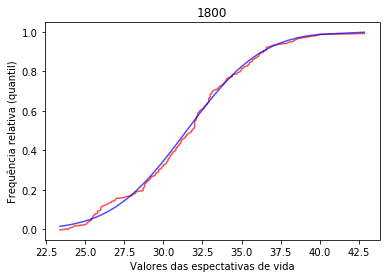

In [16]:
plt.plot (sorted(pd1800), frequencisa_relativa, lw = 1.5, color = 'r', alpha = 0.7, label = 'Frequência empírica')
plt.plot (sorted(pd1800), frequencisa_normal1800, lw =1.5, color = 'b', alpha = 0.7, label = 'Frequência na distribuição normal')

plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das espectativas de vida')
plt.title ('1800')

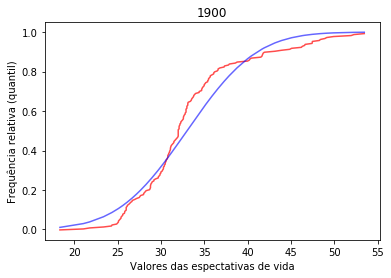

In [17]:
plt.plot (sorted(pd1900), frequencisa_relativa, lw = 1.5, color = 'r', alpha = 0.7, label = 'Frequência empírica')
plt.plot (sorted(pd1900), frequencisa_normal1900, lw = 1.5, color = 'b', alpha = 0.6, label = 'Frequência na distribuição normal')

plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das espectativas de vida')
plt.title ('1900')

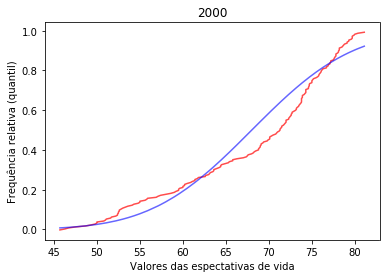

In [18]:
plt.plot (sorted(pd2000), frequencisa_relativa, lw = 1.5, color = 'r', alpha = 0.7, label = 'Frequência empírica')
plt.plot (sorted(pd2000), frequencisa_normal2000, lw = 1.5, color = 'b', alpha = 0.6, label = 'Frequência na distribuição normal')

plt.ylabel ('Frequência relativa (quantil)')
plt.xlabel ('Valores das espectativas de vida')
plt.title ('2000')

Através dos gráficos gerados, percebe-se que nenhum dos anos estudados representa um modelo normal. O ano de 1800, que pareceu representar melhor nos gráficos anteriores, mostrou que tambem esta um pouco fora do padrão normal.Já os de 1900 e 2000 representam maior diferencia entre eles e o modelo Normal.  

In [19]:
quantil1800 = []
for i in frequencisa_relativa:
    quantil1800.append(stats.norm.ppf (i, loc = mi1800, scale = teta1800))

quantil1900 = []
for i in frequencisa_relativa:
    quantil1900.append(stats.norm.ppf (i, loc = mi1900, scale = teta1900))

quantil2000 = []
for i in frequencisa_relativa:
    quantil2000.append(stats.norm.ppf (i, loc = mi2000, scale = teta2000))

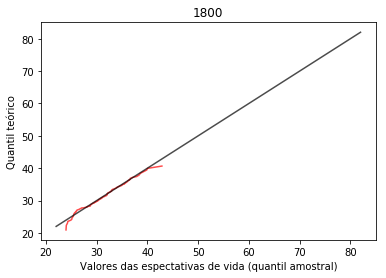

In [20]:
plt.plot (sorted(pd1800), quantil1800, lw = 1.5, color = 'r', alpha = 0.7, label = '')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

plt.ylabel ('Quantil teórico')
plt.xlabel ('Valores das espectativas de vida (quantil amostral)')
plt.title ('1800')

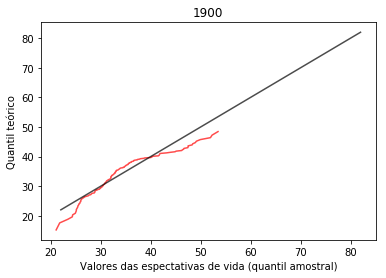

In [21]:
plt.plot (sorted(pd1900), quantil1900, lw = 1.5, color = 'r', alpha = 0.7, label = '')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

plt.ylabel ('Quantil teórico')
plt.xlabel ('Valores das espectativas de vida (quantil amostral)')
plt.title ('1900')

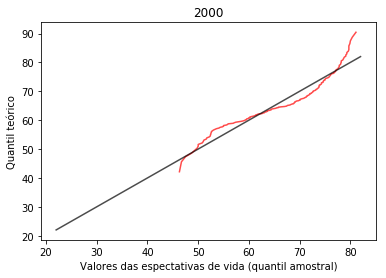

In [22]:
plt.plot (sorted(pd2000), quantil2000, lw = 1.5, color = 'r', alpha = 0.7, label = '')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)

plt.ylabel ('Quantil teórico')
plt.xlabel ('Valores das espectativas de vida (quantil amostral)')
plt.title ('2000')

Esses últimos gráficos apresentados demonstram a relação entre um Z teórico da função representada pela distribuição normal e do Z real da função, cortado por uma bissetriz. Esse modelo representa em X o modelo real, e em Y o teórico, assim ele demonstra que quanto mais proximo á bissetriz o gráfico está, mais parecida é a função com o modelo normal.

___
### Aderência de um modelo probabilístico assimétrico aos dados

In [23]:
g1800, mi1800, teta1800 = stats.gamma.fit(pd1800)
g1900, mi1900, teta1900 = stats.gamma.fit(pd1900)
g2000, mi2000, teta2000 = stats.gamma.fit(pd2000)
    

fdp1800 = stats.gamma.pdf(sorted(pd1800),g1800,loc=mi1800,scale=teta1800)
fdp1900 = stats.gamma.pdf(sorted(pd1900),g1900,loc=mi1900,scale=teta1900)
fdp2000 = stats.gamma.pdf(sorted(pd2000),g2000,loc=mi2000,scale=teta2000)

cdf1800 = stats.gamma.cdf(sorted(pd1800), g1800, loc = mi1800, scale = teta1800)
cdf1900 = stats.gamma.cdf(sorted(pd1900), g1900, loc = mi1900, scale = teta1900)
cdf2000 = stats.gamma.cdf(sorted(pd2000), g2000, loc = mi2000, scale = teta2000)

ppf1800 = stats.gamma.ppf(frequencisa_relativa, g1800, loc = mi1800, scale = teta1800)
ppf1900 = stats.gamma.ppf(frequencisa_relativa, g1900, loc = mi1900, scale = teta1900)
ppf2000 = stats.gamma.ppf(frequencisa_relativa, g2000, loc = mi2000, scale = teta2000)

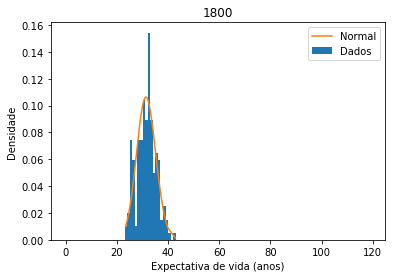

In [24]:
plt.hist(pd1800, bins=faixas, alpha=1, normed=1)
plt.plot(sorted(pd1800), fdp1800)
plt.title('1800')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

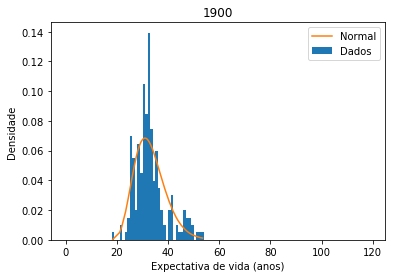

In [25]:
plt.hist(pd1900, bins=faixas, alpha=1, normed=1)
plt.plot(sorted(pd1900), fdp1900)
plt.title('1900')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

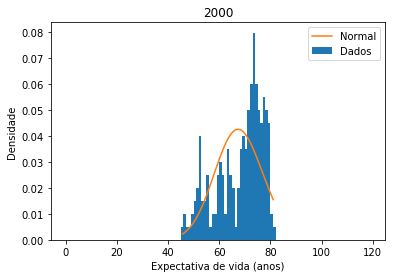

In [26]:
plt.hist(pd2000, bins=faixas, alpha=1, normed=1)
plt.plot(sorted(pd2000), fdp2000)
plt.title('2000')
plt.legend(('Normal', 'Dados'))
plt.ylabel('Densidade')
plt.xlabel('Expectativa de vida (anos)')

Percebe-se no sistema que tanto 1900 e 2000 são modelos assimétricos, onde 1900 tem assimetria negativa e 2000 positiva.

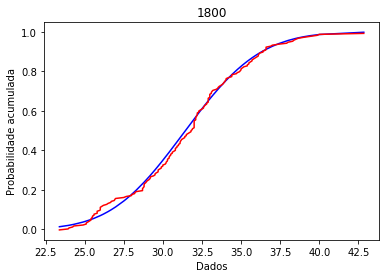

In [27]:
plt.plot(sorted(pd1800), cdf1800, color = 'b')
plt.plot(sorted(pd1800), frequencisa_relativa, color = 'r')
plt.title('1800')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

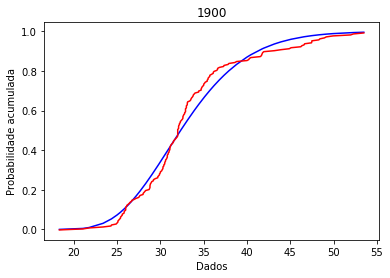

In [28]:
plt.plot(sorted(pd1900), cdf1900, color = 'b')
plt.plot(sorted(pd1900), frequencisa_relativa, color = 'r')
plt.title('1900')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

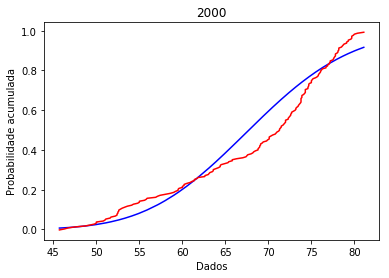

In [29]:
g2000, b2000, mi2000, teta2000 = stats.beta.fit(pd2000)
cddf2000 = stats.beta.cdf(sorted(pd2000), g2000, b2000, loc = mi2000, scale = teta2000)


plt.plot(sorted(pd2000), cdf2000, color = 'b')
plt.plot(sorted(pd2000), frequencisa_relativa, color = 'r')
plt.title('2000')
plt.xlabel('Dados')
plt.ylabel('Probabilidade acumulada')

percebe-se que as probabilidades acumuladas teóricas dos modelos de distribuição assimétrica são mais proximas ao sistema real que na distribuição normal. 

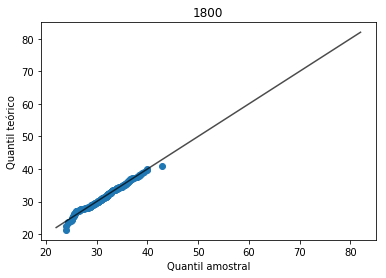

In [30]:
plt.plot(sorted(pd1800), ppf1800, 'o')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)
plt.title('1800')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

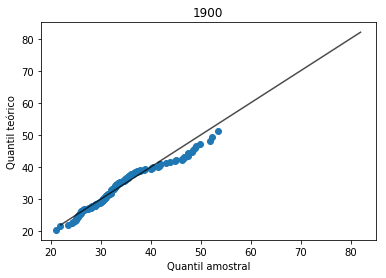

In [31]:
plt.plot(sorted(pd1900), ppf1900, 'o')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)
plt.title('1900')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

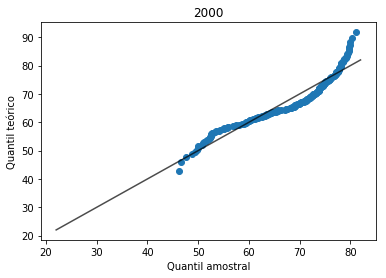

In [32]:
plt.plot(sorted(pd2000), ppf2000, 'o')
plt.plot ([22, 82], [22, 82], label = 'Bissetriz do 1º quadrante', color = 'Black', alpha = 0.7)
plt.title('2000')
plt.xlabel('Quantil amostral')
plt.ylabel('Quantil teórico')

Nestes ultimos gráficos vê-se que quanto mais perto do x = y, mais a função é próxima á distribuição assimtétrica. Com destaque para o ano 1800, que é o mais simétrico dos 3 anos.

___
### Cálculo de probabilidades a partir da distribuição normal

In [33]:
maior_70_1800 = 1 - stats.norm.cdf(70, loc = mi1800, scale = teta1800)
maior_70_1900 = 1 - stats.norm.cdf(70, loc = mi1900, scale = teta1900)
maior_70_2000 = 1 - stats.norm.cdf(70, loc = mi2000, scale = teta2000)

In [34]:

maior_70_1800 = maior_70_1800 *100
maior_70_1900 = maior_70_1900 *100
maior_70_2000 = maior_70_2000 *100

In [35]:
print ('Probabilidade de um país de 1800 ter espectativa de vida > 70 anos:', maior_70_1800, '%')


Probabilidade de um país de 1800 ter espectativa de vida > 70 anos: 0.0 %


In [36]:
print ('Probabilidade de um país de 1900 ter espectativa de vida > 70 anos:', maior_70_1900, '%')


Probabilidade de um país de 1900 ter espectativa de vida > 70 anos: 0.0 %


In [37]:
print ('Probabilidade de um país de 2000 ter espectativa de vida > 70 anos:', maior_70_2000, '%')


Probabilidade de um país de 2000 ter espectativa de vida > 70 anos: 24.6110097125 %


In [38]:
inf75_1800 = (stats.norm.cdf(70, loc = mi1800, scale = teta1800) - stats.norm.cdf(70, loc = mi1800, scale = teta1800)) / (stats.norm.cdf(74, loc = mi1800, scale = teta1800) - stats.norm.cdf(70, loc = mi1800, scale = teta1800))
inf75_1900 = (stats.norm.cdf(70, loc = mi1900, scale = teta1900) - stats.norm.cdf(70, loc = mi1900, scale = teta1900)) / (stats.norm.cdf(74, loc = mi1900, scale = teta1900) - stats.norm.cdf(70, loc = mi1900, scale = teta1900))
inf75_2000 = (stats.norm.cdf(75, loc = mi2000, scale = teta2000) - stats.norm.cdf(70, loc = mi2000, scale = teta2000)) / (stats.norm.cdf(84, loc = mi2000, scale = teta2000) - stats.norm.cdf(70, loc = mi2000, scale = teta2000))

C:\Users\frana\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
C:\Users\frana\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


In [39]:
print ('Probabilidade de um país de 1800 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos:',0, '%')

Probabilidade de um país de 1800 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos: 0 %


In [40]:
print ('Probabilidade de um país de 1900 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos:', inf75_1900, '%')

Probabilidade de um país de 1900 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos: nan %


In [41]:
print ('Probabilidade de um país de 2000 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos:', inf75_2000, '%')

Probabilidade de um país de 2000 ter espectativa de vida menor que 75 anos, sabendo que este país tem espectativa maior que 70 anos: 0.396803746504 %


In [42]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 1800:', stats.norm.ppf(0.10, loc = mi1800, scale = teta1800))

Maior espectativa de vida dos 10% com menor espectativa de 1800: -68.0531107145


In [43]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 1900:', stats.norm.ppf(0.10, loc = mi1900, scale = teta1900))

Maior espectativa de vida dos 10% com menor espectativa de 1900: 12.128777238


In [44]:
print ('Maior espectativa de vida dos 10% com menor espectativa de 2000:', stats.norm.ppf(0.10, loc = mi2000, scale = teta2000))

Maior espectativa de vida dos 10% com menor espectativa de 2000: 0.245093417888


In [45]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 1800:', stats.norm.ppf(0.90, loc = mi1800, scale = teta1800))

Menor espectativa de vida dos 10% com maior espectativa de 1800: -67.6898073088


In [46]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 1900:', stats.norm.ppf(0.90, loc = mi1900, scale = teta1900))

Menor espectativa de vida dos 10% com maior espectativa de 1900: 17.3964409595


In [47]:
print ('Menor espectativa de vida dos 10% com maior espectativa de 2000:', stats.norm.ppf(0.90, loc = mi2000, scale = teta2000))

Menor espectativa de vida dos 10% com maior espectativa de 2000: 91.0777826081
